In [1]:
import pandas as pd     #type: ignore
import numpy as np      #type: ignore
import matplotlib.pyplot as plt     #type: ignore
import seaborn as sns       #type: ignore
import xgboost as xgb       #type: ignore
import warnings 
from sklearn.model_selection import train_test_split #type: ignore
warnings.filterwarnings('ignore')

df = pd.read_csv('')
df = df[['OrderDate', 'SubTotal']]
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate',inplace=True)
df = df.groupby('OrderDate').sum()
df.head()




,SubTotal
OrderDate,
2011-05-31,503805.9169
2011-06-01,13931.5200
2011-06-02,15012.1782
2011-06-03,7156.5400
2011-06-04,15012.1782


In [2]:
train = df[:800]
test = df[800:]

<Axes: title={'center': 'Daily Sales'}, xlabel='OrderDate'>

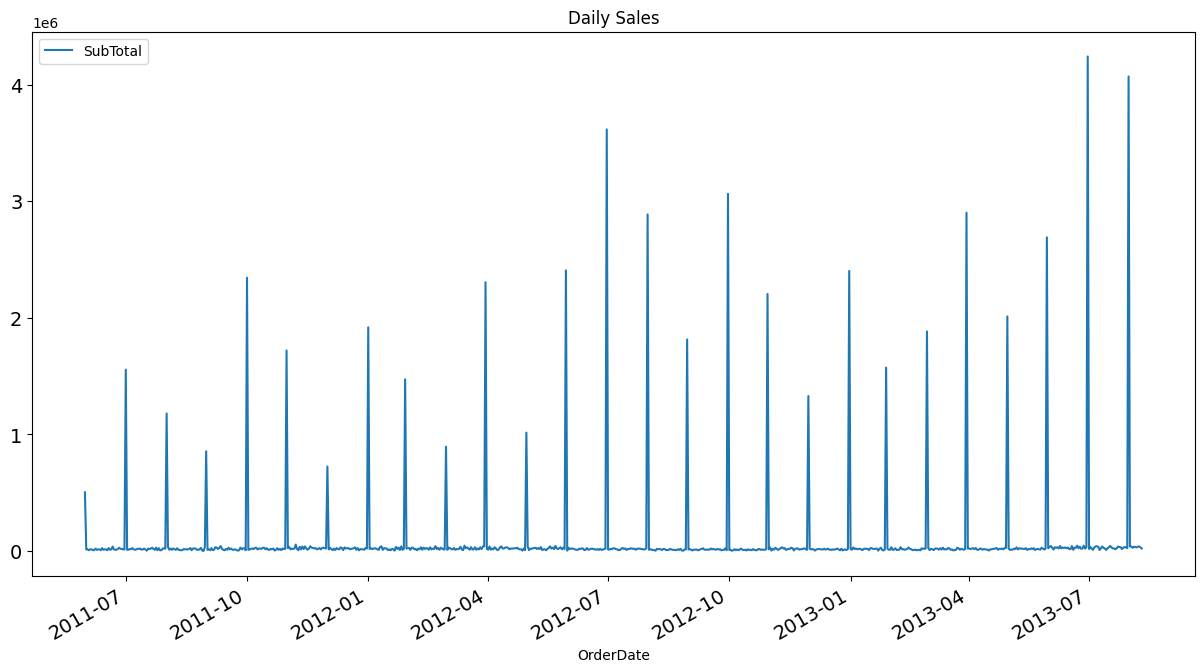

In [3]:
train.plot(figsize=(15,8), title= 'Daily Sales', fontsize=14)

In [4]:
def create_features(df,label= None):
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    X = df[['dayofweek','month','year','dayofyear','dayofmonth']]
    if label:
        y = df[label]
        return X,y
    return X

In [5]:
X_train, y_train = create_features(train, label='SubTotal')
X_test, y_test = create_features(test, label='SubTotal')


In [6]:
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=1000,verbose= True)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

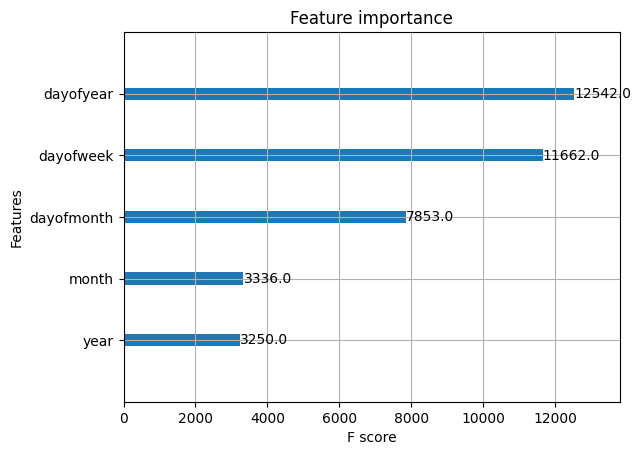

In [7]:
#feature importance
xgb.plot_importance(model)

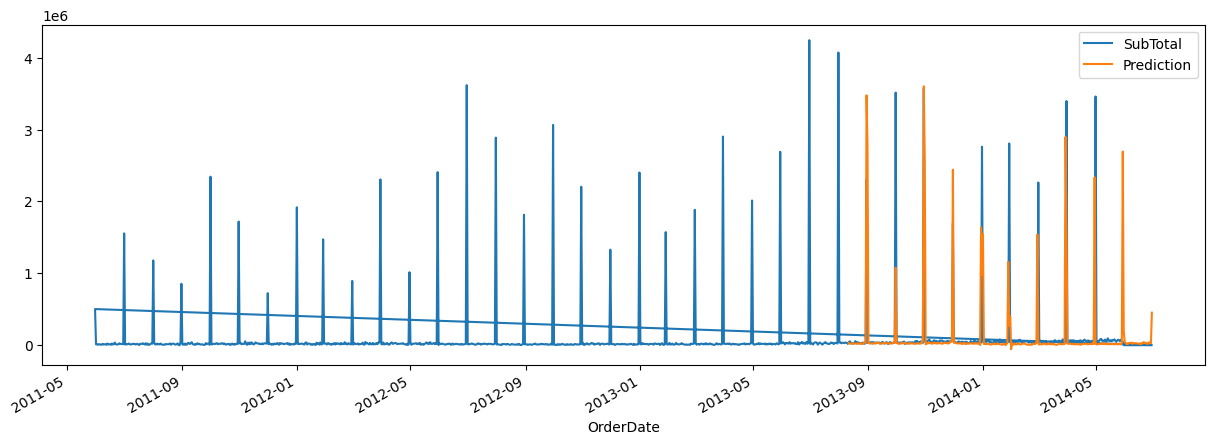

In [8]:
test['Prediction'] = model.predict(X_test)

total = pd.concat([test, train], sort= False)

_ = total[['SubTotal','Prediction']].plot(figsize=(15, 5))



In [9]:
mean_squared_error = np.sqrt(np.mean(np.square(test['SubTotal'] - test['Prediction'])))
print(mean_squared_error)

497836.4766991779


In [10]:
mean_squared_percentage_error = np.mean(np.abs(test['SubTotal'] - test['Prediction'])/test['SubTotal'])
print(mean_squared_percentage_error)

4.097244788142096


## LIGHTGBM



In [12]:
import lightgbm as lgb

model_2 = lgb.LGBMRegressor(objective='regression', n_estimators=1000)
model_2.fit(X_train, y_train)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 311
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] Start training from score 87597.823183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(n_estimators=1000, objective='regression')

In [13]:
y_pred = model_2.predict(X_test)

In [14]:
mean_squared_percentage_error = np.mean(np.abs(test['SubTotal'] - y_pred)/test['SubTotal'])
print(mean_squared_percentage_error)

11.436106952565916
